# 1D Linear Convection

Solves by FDM (forward in time, backward in space):

$$ \frac{ \partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0 $$

wave speed $c = 1$

Initial Condition
$$ u_0(x)=   \left\{
\begin{array}{ll}
      1 & 0 \leq x<0.5 \\
      2 & 0.5 \leq x \leq 1 \\
      1 & 1 < x \leq 2
\end{array} 
\right.  $$

Boundary Condition: $u(0,t) = 1$


In [92]:
import numpy as np
from matplotlib import pyplot as plt
import time, sys
%matplotlib inline

In [93]:
x_start, x_end = 0, 2 # domain limits
nodes_x = 41    # number of spatial nodes
steps_t = 25    # number of time steps
dx = (x_end - x_start)/(nodes_x-1)  # distance between spatial nodes
dt = 0.025       # time step
c  = 1           # wave speed

In [94]:
x  = np.linspace(x_start, x_end, nodes_x)
u1 = np.ones(nodes_x) # solution at nth time step
u2 = np.ones(nodes_x) # solution at (n+1)th time step

u1[int(0.5/dx):int(1/dx)] = 2 # set initial conditions

Text(0, 0.5, 'u')

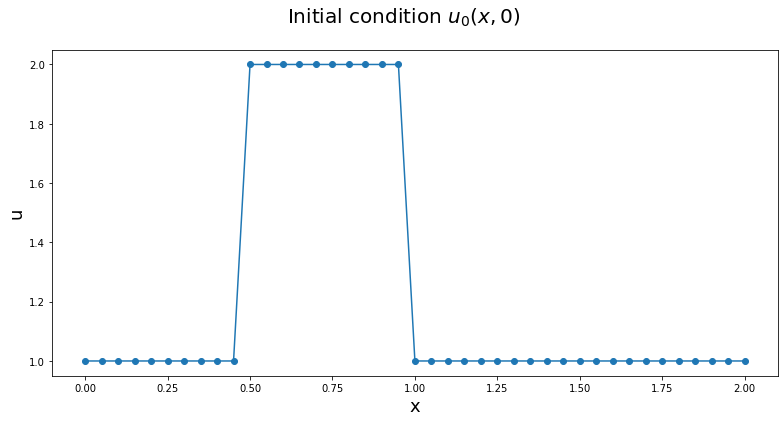

In [95]:
# plot initial conditions
fig, ax = plt.subplots(figsize=[13,6])
fig.suptitle("Initial condition $u_0(x,0)$", fontsize=20)
ax.plot(x, u1, marker="o")
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("u", fontsize=18)

Text(0, 0.5, 'u')

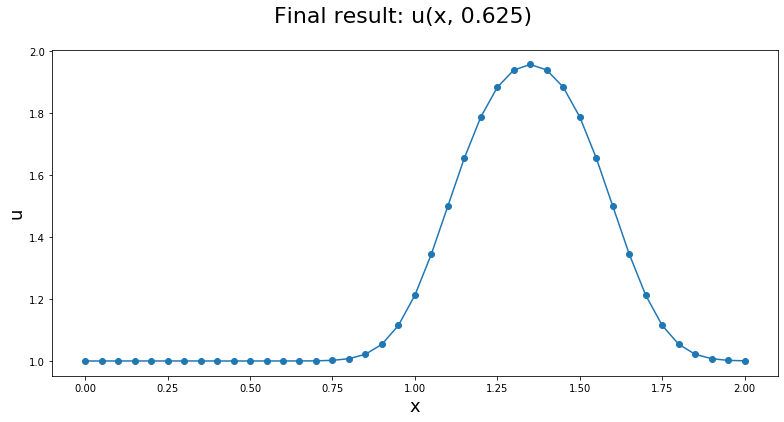

In [96]:
# solve the finite difference equation
for n in range(steps_t):
    u2[1:] = u1[1:] - (c*dt/dx) * (u1[1:] - u1[0:-1])
    u1 = u2

# plot results
fig, ax = plt.subplots(figsize=[13,6])
fig.suptitle("Final result: u(x, {})".format(steps_t*dt), fontsize=22)
ax.plot(x, u2, marker="o")
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("u", fontsize=18)

Gradients are smoothened due to artificial viscosity.